In [1]:
# --- SECTION 1 ---
# Libraries and data loading
import numpy as np
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

digits = load_digits()

train_size = 1500
train_x, train_y = digits.data[:train_size], digits.target[:train_size]
test_x, test_y = digits.data[train_size:], digits.target[train_size:]

np.random.seed(123456)# --- SECTION 2 ---
# Create the ensemble
ensemble_size = 200
learning_rate = 0.1
ensemble = GradientBoostingClassifier(n_estimators=ensemble_size,
                                    learning_rate=learning_rate)

In [2]:
# --- SECTION 3 ---
# Train the ensemble
ensemble.fit(train_x, train_y)

GradientBoostingClassifier(n_estimators=200)

In [3]:
# --- SECTION 4 ---
# Evaluate the ensemble
ensemble_predictions = ensemble.predict(test_x)
ensemble_acc = metrics.accuracy_score(test_y, ensemble_predictions)

Boosting: 0.88


C:\Users\Dinova\AppData\Local\Temp\ipykernel_17208\3323729639.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


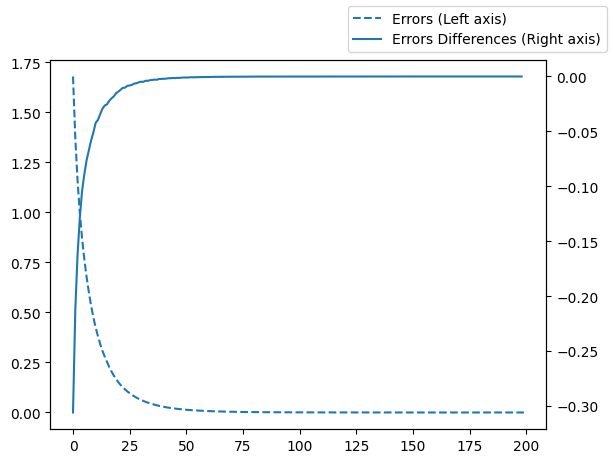

In [4]:
# --- SECTION 5 ---
# Print the accuracy
print('Boosting: %.2f' % ensemble_acc)

import matplotlib.pyplot as plt
diffs = [ensemble.train_score_[i] - ensemble.train_score_[i-1] for i in range(1, len(ensemble.train_score_))]

fig, ax1 = plt.subplots()
ax1.plot(ensemble.train_score_, linestyle='--', label='Errors (Left axis)')

ax2 = ax1.twinx()
ax2.plot(diffs, label='Errors Differences (Right axis)')
fig.legend()
fig.show()